In [1]:
#importing the libraries
import pandas as pd

In [2]:
#reading the file
data = pd.read_csv('datasets\\forward_feature_selection.csv')

In [3]:
# first 5 rows of the data
data.head()

,ID,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,AB101,1,0,0,1,9.84,81,0.0,16
1,AB102,1,0,0,1,9.02,80,0.0,40
2,AB103,1,0,0,1,9.02,80,0.0,32
3,AB104,1,0,0,1,9.84,75,0.0,13
4,AB105,1,0,0,1,9.84,75,0.0,1


In [4]:
#shape of the data
data.shape

(12980, 9)

In [5]:
# checking missing values in the data
data.isnull().sum()

ID            0
season        0
holiday       0
workingday    0
weather       0
temp          0
humidity      0
windspeed     0
count         0
dtype: int64

<AxesSubplot:>

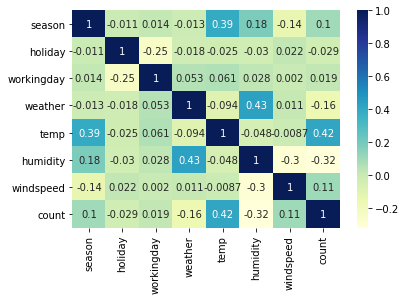

In [6]:
import seaborn as sb

  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
dataplot

In [7]:
# creating the training data
X = data.drop(['ID', 'count'], axis=1)
y = data['count']

In [8]:
X.shape, y.shape

((12980, 7), (12980,))

In [9]:
!pip install mlxtend

In [10]:
# importing the models
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [11]:
# calling the linear regression model
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [12]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2021-12-01 20:13:11] Features: 1/4 -- score: -23364.955503180994[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2021-12-01 20:13:11] Features: 2/4 -- score: -21454.899339219788[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2021-12-01 20:13:12] Features: 3/4 -- score: -21458.27878856439[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [13]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['holiday', 'workingday', 'temp', 'humidity']


In [14]:
# creating a new dataframe using the above variables and adding the target variable
new_data = data[feat_names]
new_data['count'] = data['count']

E:\Anaconda3\envs\ml_3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# first five rows of the new data
new_data.head()

,holiday,workingday,temp,humidity,count
0,0,0,9.84,81,16
1,0,0,9.02,80,40
2,0,0,9.02,80,32
3,0,0,9.84,75,13
4,0,0,9.84,75,1


In [18]:
# shape of new and original data
new_data.shape, data.shape

((12980, 5), (12980, 9))

<br><br>
<img src="what have we covered.png">